In [3]:
import random
import torch as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn ## nn contains all of PT building blocks

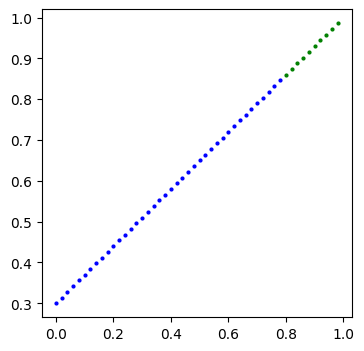

In [4]:
import torch as pt
import matplotlib.pyplot as plt
weight, bias = 0.7, 0.3

# create data 
start = 0
end = 1 
dx = 0.02
X = pt.arange(start, end, dx).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

tsplit=  int(0.8 * len(X))
X_train, y_train = X[:tsplit], y[:tsplit]
X_test, y_test = X[tsplit:], y[tsplit:]

def plot_pred(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, preds = None):
    plt.figure(figsize=(4,4))
    plt.scatter(train_data, train_labels, c="blue", s=4)
    plt.scatter(test_data, test_labels, c="g", s=4)
    if preds is not None:
        plt.scatter(test_data, preds, c="r", s=4)
  
plot_pred()

In [6]:
## first pytorch model, linear regression --> Y = B_0, B_1X + Err

class LinReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(pt.randn(1,requires_grad=True, dtype=pt.float)) ## requires_grad --> keeps track of the parameters, and then updates them
        self.bias = nn.Parameter(pt.randn(1, requires_grad = True, dtype=pt.float))

    def forward(self, x: pt.Tensor) -> pt.Tensor:
        return self.weights * x + self.bias ## linear regression formula

## gradient descent:abs
## start with random values, looks at training data, and adjust the random values to get close to ideal valuesabs
## through gradient descent and backpropagation

pt.manual_seed(42)
## instance of the model we created
model_0 = LinReg()
list(model_0.parameters())
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
## making predictions with pt.infrence_mode()
with pt.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [81]:
## training our first model --> whole idea of training  is for model to move from unknown parameters to some known parameters.
## from a poor representation to a better representation of the data :3

## loss function
loss_fn  = nn.L1Loss()
loss_fn

# optimizer function
para = model_0.parameters()
optim_fm = pt.optim.ASGD(para, lr=0.01)
## param is a value the model sets itself, learning rate (lr)  is a hyperparameter that we can set

ASGD (
Parameter Group 0
    alpha: 0.75
    capturable: False
    differentiable: False
    foreach: None
    lambd: 0.0001
    lr: 0.01
    maximize: False
    t0: 1000000.0
    weight_decay: 0
)

In [1]:
## creating a trainling loop and testing loop 
epochs = 100 ## amount of times to test, i.e. n loop through the data
for epoch in range(epochs):
    ## setting model to training mode 
    model_0.train() ## model_0.eval(), turns off gradient tracking
    ## forward pass
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train) ## --> predicted - exepected or input - target

    ## optimizer, zero gradient
    optim_fm.zero_grad()

    ## perform backprop on loss 
    loss.backward()

    ## step the optimizer
    optim_fm.step()
    


NameError: name 'model_0' is not defined